# IMPORTING LIBRARIES

In [1]:
import numpy as np 
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import cv2, PIL, glob, pathlib
import os

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

# DATA PREPARATION

In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\mohit\Desktop\MajorProject2'):
    for filename in filenames:
        pass


In [4]:
normal = pathlib.Path(r"C:\Users\mohit\Desktop\MajorProject2\dataset\normal")
glaucoma = pathlib.Path(r"C:\Users\mohit\Desktop\MajorProject2\dataset\glaucoma")
DiabRetino=pathlib.Path(r"C:\Users\mohit\Desktop\MajorProject2\dataset\DiabRetino")
cataract = pathlib.Path(r"C:\Users\mohit\Desktop\MajorProject2\dataset\cataract")

In [5]:
images_dict = {"normal": list(normal.glob("*.jpg")),
              "glaucoma": list(glaucoma.glob("*.jpg")),
              "DiabRetino":list(DiabRetino.glob("*.jpeg")),
              "cataract":list(cataract.glob("*.jpg"))}
labels_dict = {
    "normal":0, "glaucoma":1, "DiabRetino":2, "cataract":3er
}

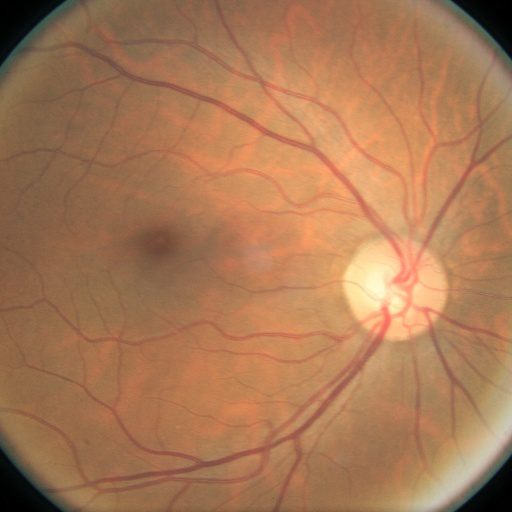

In [6]:
PIL.Image.open(str(images_dict["DiabRetino"][356]))

# DATA PREPROCESSING

In [7]:
X, y = [], []
for label, images in images_dict.items():
    for image in images:
        image = cv2.imread(str(image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (180, 180))
        if image is not None:
            X.append(image) 
            y.append(labels_dict[label]) 

In [8]:
X = np.array(X)
y = np.array(y)

In [10]:
X = X/255

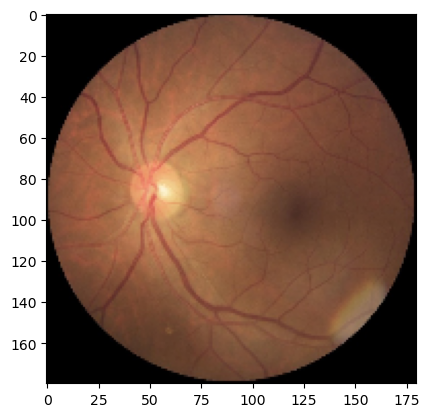

In [9]:
plt.imshow(X[0])
plt.show()

# SPLITTING DATA INTO TRAINING AND TEST SETS

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [13]:
print(y_test)

[3 3 2 1 0 2 3 1 3 2 2 1 1 1 0 3 3 3 0 0 2 2 3 3 0 0 0 0 3 3 0 2 3 1 1 1 0
 2 2 1 3 0 1 2 2 0 2 2 2 2 2 2 0 2 2 1 2 0 0 2 2 3 1 2 3 0 3 3 3 1 0 1 2 2
 3 2 1 1 3 2 0 3 0 1 0 1 1 0 3 2 1 0 1 0 3 3 2 0 2 0 3 1 1 1 1 1 0 1 3 3 3
 3 2 3 3 1 3 0 2 3 1 0 2 2 2 0 3 1 1 1 1 0 0 3 0 0 0 2 2 3 1 2 0 3 2 2 1 2
 0 1 2 1 0 0 2 1 3 3 0 0 3 3 0 0 1 0 1 3 0 1 0 3 3 3 2 3 3 3 2 1 3 1 2 1 3
 1 0 2 2 0 1 3 3 0 3 1 0 1 3 1 2 2 1 0 3 0 2 0 2 1 3 3 3 3 1 1 0 1 1 2 2 1
 3 2 2 0 2 3 2 1 0 2 2 0 0 0 2 3 1 2 0 2 0 0 3 2 1 3 0 2 1 0 0 0 2 3 2 3 3
 0 2 1 2 3 3 0 3 0 0 2 0 1 2 3 1 1 1 2 0 1 1 0 2 3 2 1 3 2 2 0 3 2 0 3 2 3
 1 2 1 3 2 0 2 3 2 0 3 3 0 1 0 0 3 3 0 1 0 2 2 1 1 2 2 1 0 2 3 3 3 0 1 1 0
 0 0 2 1 0 0 2 0 0 2 0 3 0 1 2 1 0 1 1 3 2 2 1 3 2 2 0 3 0 1 0 2 3 1 3 3 1
 2 0 3 1 0 0 2 0 2 0 1 3 0 0 1 2 3 3 2 3 1 3 2 1 0 2 2 3 3 3 1 1 3 2 0 2 3
 0 2 2 1 2 1 3 0 3 1 0 0 0 3 3 2 0 3 1 0 0 3 2 0 3 3 0 0 0 0 0 0 3 0 2 2 1
 3 1 1 2 2 0 1 1 3 0 2 3 2 0 3 0 1 2 1 3 1 3 2 1 2 3 3 1 3 2 1 3 1 0 1 0 2
 2 0 1 0 1 3 0 0 3 1 2 3 

# MODEL BUILDING AND TRAINING

In [15]:
#data augmentation
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomContrast(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.7)
])

In [16]:
model = keras.Sequential([  
    data_argumentation,
    layers.Conv2D(64, (5, 5), padding="same",   input_shape=(180, 180, 3), activation="softmax"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(8, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(50, activation="sigmoid"),
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
101/101 [==============================] - 182s 2s/step - loss: 1.5563 - accuracy: 0.2684
Epoch 2/150
101/101 [==============================] - 166s 2s/step - loss: 1.3943 - accuracy: 0.2846
Epoch 3/150
101/101 [==============================] - 164s 2s/step - loss: 1.3685 - accuracy: 0.2998
Epoch 4/150
101/101 [==============================] - 165s 2s/step - loss: 1.3505 - accuracy: 0.3328
Epoch 5/150
101/101 [==============================] - 167s 2s/step - loss: 1.3387 - accuracy: 0.3294
Epoch 6/150
101/101 [==============================] - 170s 2s/step - loss: 1.3196 - accuracy: 0.3543
Epoch 7/150
101/101 [==============================] - 172s 2s/step - loss: 1.3056 - accuracy: 0.3773
Epoch 8/150
101/101 [==============================] - 175s 2s/step - loss: 1.2760 - accuracy: 0.4063
Epoch 9/150
101/101 [==============================] - 176s 2s/step - loss: 1.2684 - accuracy: 0.4156
Epoch 10/150
101/101 [==============================] - 175s 2s/step - loss: 1.244

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        51232     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 16)       

# EVALUATING MODEL ON TEST SET

In [20]:
score = model.evaluate(X_test, y_test)

26/26 [==============================] - 7s 258ms/step - loss: 0.7893 - accuracy: 0.6741


In [21]:
print('Test loss:', score[0]*100) 
print('Test accuracy:', score[1]*100)

Test loss: 78.93233895301819
Test accuracy: 67.41293668746948


# MODEL EVALUATION FOR FIRST 10 VALUES OF TEST SET

In [24]:
y_pred = model.predict(X_test[:10]) # predicting first 10 values
predslist = []
for i in y_pred:
    predslist.append(np.argmax(i)) # argmax() returns max value of an array

1/1 [==============================] - 0s 179ms/step


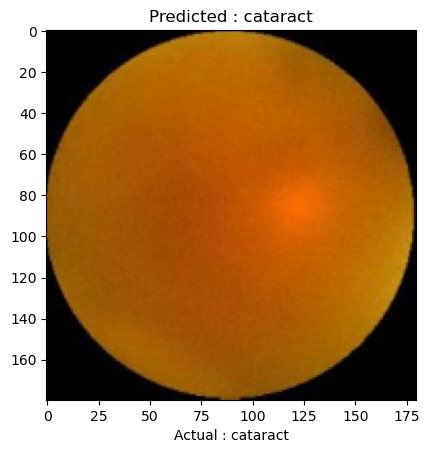

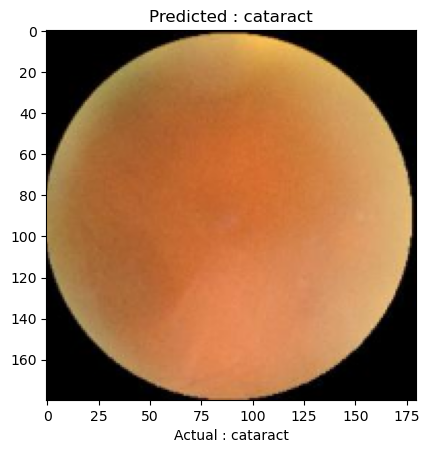

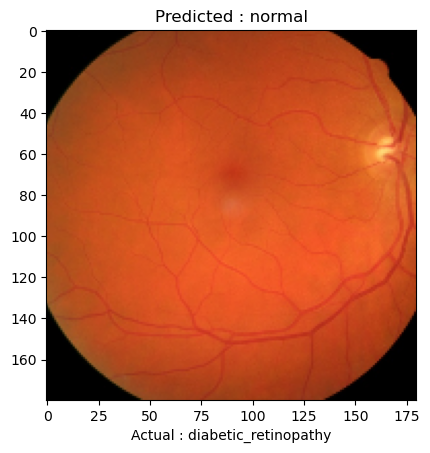

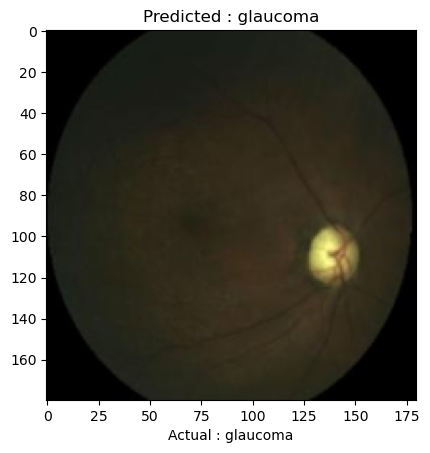

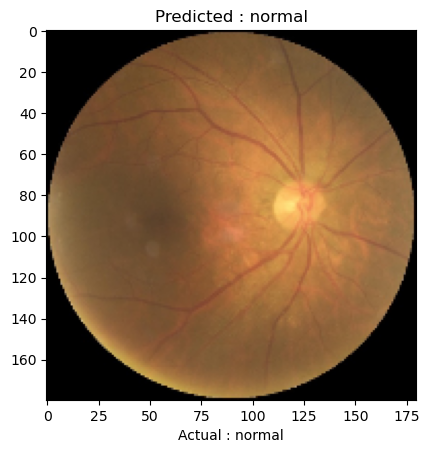

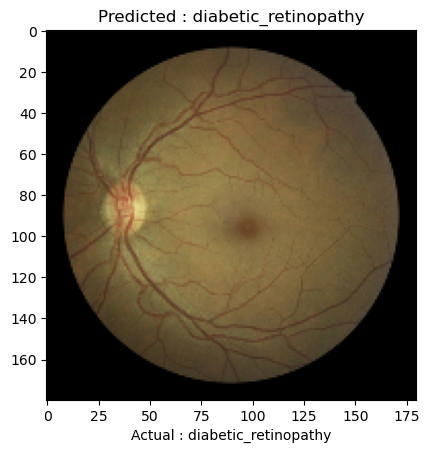

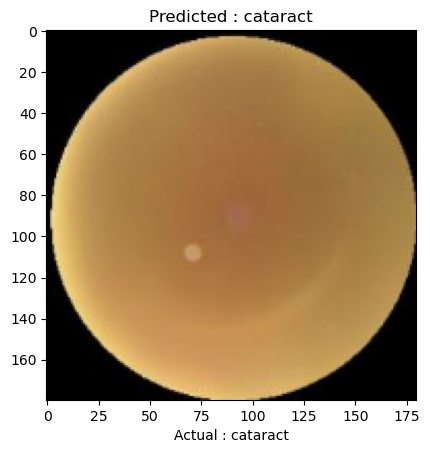

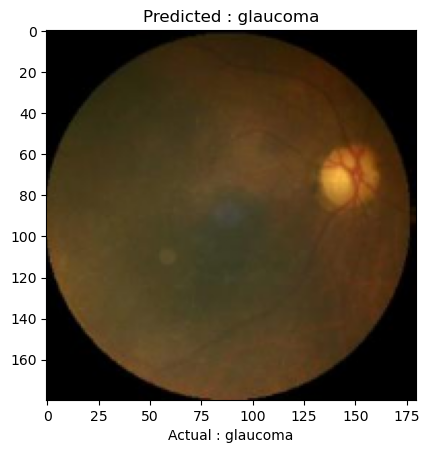

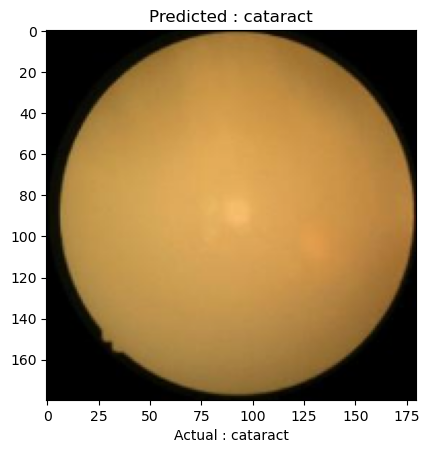

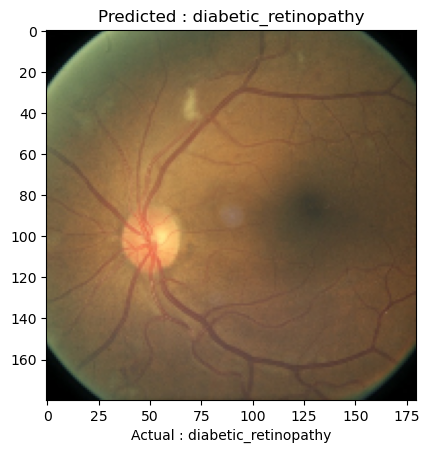

In [25]:
answers = ["normal", 'glaucoma', "diabetic_retinopathy", "cataract"]
for i in range(10):
    plt.imshow(X_test[i])
    plt.title("Predicted : "+ str(answers[predslist[i]]))
    plt.xlabel("Actual : "+str(answers[y_test[i]]))
    plt.show()

# CLASSIFICATION REPORT OF OUR MODEL

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
print(y_pred)

26/26 [==============================] - 7s 261ms/step
[[2.6500422e-01 2.2125940e-01 5.0637953e-02 ... 3.8817877e-24
  6.5735625e-24 9.7019478e-24]
 [2.1537673e-01 1.8466038e-01 1.9018771e-02 ... 9.3039310e-25
  1.2458349e-24 1.9498017e-24]
 [8.3453900e-01 5.9698004e-01 1.4750101e-01 ... 5.1430051e-16
  5.2807777e-16 4.8454334e-16]
 ...
 [6.7241794e-01 3.9849114e-01 1.9418700e-01 ... 7.3778650e-25
  9.2412866e-25 1.4593929e-24]
 [3.4640476e-01 7.1736151e-01 8.7854832e-02 ... 4.4774843e-23
  5.6161305e-23 4.2631981e-23]
 [4.7248253e-01 6.5374774e-01 9.5323545e-01 ... 6.5182011e-17
  5.9169182e-17 5.3726181e-17]]


In [27]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("Classification Report :\n", classification_report(y_test, y_pred_classes))

26/26 [==============================] - 7s 287ms/step
Classification Report :
               precision    recall  f1-score   support

           0       0.64      0.48      0.55       212
           1       0.57      0.63      0.60       178
           2       0.89      0.70      0.78       215
           3       0.64      0.89      0.74       199

    accuracy                           0.67       804
   macro avg       0.68      0.68      0.67       804
weighted avg       0.69      0.67      0.67       804



ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (804).

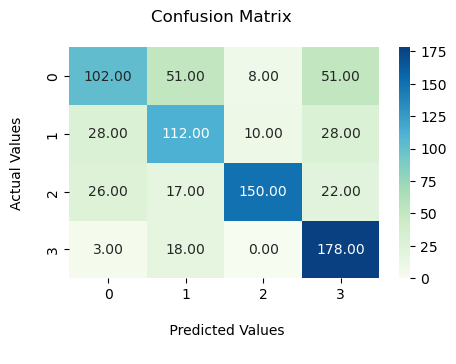

In [43]:
class_names = [np.argmax(element) for element in y_pred]
plt.figure(figsize=(5,3))
fx=sn.heatmap(confusion_matrix(y_test,y_pred_classes), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(class_names)
fx.yaxis.set_ticklabels(class_names)
plt.show()